In [11]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [1]:
import pandas as pd

df = pd.read_csv("/content/SafeReels_1k - SafeReels_1k.csv")
df

,reel_id,isSafe,UnsafeType,Visual texts
0,www.facebook.com/reel/1000188341415358,1,Safe,Me on my way to watch Oppenheimer After Berbie
1,www.facebook.com/reel/1006146964533997,1,Safe,NaN
2,www.facebook.com/reel/1007123741459823,0,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love
3,www.facebook.com/reel/1007420607202244,1,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop
4,www.facebook.com/reel/1008519870870927,1,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং
...,...,...,...,...
995,www.facebook.com/reel/940909878048735,1,Safe,NaN
996,www.facebook.com/reel/8236624349796329,0,Adult,NaN
997,www.facebook.com/reel/1453970955170687,1,Safe,NaN
998,www.facebook.com/reel/1250600472816174,1,Safe,NaN


In [3]:
df = df[:664]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reel_id       664 non-null    object
 1   isSafe        664 non-null    int64 
 2   UnsafeType    664 non-null    object
 3   Visual texts  409 non-null    object
dtypes: int64(1), object(3)
memory usage: 20.9+ KB


In [5]:
df['Visual texts'] = df['Visual texts'].fillna("কোন টেক্সট পাওয়া যায়নি")
df

<ipython-input-5-2648f4981c37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Visual texts'] = df['Visual texts'].fillna("কোন টেক্সট পাওয়া যায়নি")


,reel_id,isSafe,UnsafeType,Visual texts
0,www.facebook.com/reel/1000188341415358,1,Safe,Me on my way to watch Oppenheimer After Berbie
1,www.facebook.com/reel/1006146964533997,1,Safe,কোন টেক্সট পাওয়া যায়নি
2,www.facebook.com/reel/1007123741459823,0,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love
3,www.facebook.com/reel/1007420607202244,1,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop
4,www.facebook.com/reel/1008519870870927,1,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং
...,...,...,...,...
659,www.facebook.com/reel/997262608752854,0,Adult,কোন টেক্সট পাওয়া যায়নি
660,www.facebook.com/reel/997300345735398,0,Harmful,কোন টেক্সট পাওয়া যায়নি
661,www.facebook.com/reel/998187401354206,1,Safe,খবরঃ কয়লা নিয়ে মোংলা বন্দরে এলো চীনের জাহাজ দে...
662,www.facebook.com/reel/999558344609179,1,Safe,সাকিব আল হাসান to বাংলাদেশী ক্রিকেট ফ্যান


In [6]:
import requests

url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-bn/master/stopwords-bn.txt"
response = requests.get(url)
bengali_stopwords = response.text.splitlines()

print("Total Bengali Stopwords:", len(bengali_stopwords))

Total Bengali Stopwords: 398


In [7]:
banglish_stopwords = [
    "ami", "tumi", "she", "amra", "tomra", "tara", "kono", "onek", "kichu",
    "kintu", "shudhu", "jeta", "ki", "keno", "kothay", "jokhon", "tokhon",
    "abar", "ekhane", "othoba", "ba", "keu", "jodi", "chilo", "achhe", "korchi",
    "korbo", "bolchi", "dite", "niye", "jeta", "hoye", "jay", "ache", "korar",
    "bhalo", "kharap", "ar", "shesh", "jabo", "ashbo", "bolbe", "korle", "ja",
    "na", "ei", "eta", "shei", "nah"
]

In [8]:
combined_stopwords = set(bengali_stopwords + banglish_stopwords)

print("Total Combined Stopwords:", len(combined_stopwords))

Total Combined Stopwords: 446


In [9]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\u0980-\u09FF ]', '', text)  # Keep Bengali characters

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords (English and Bengali)
    stop_words = set(stopwords.words('english'))
    bengali_stopwords = combined_stopwords
    stop_words.update(bengali_stopwords)
    words = [word for word in words if word.lower() not in stop_words and len(word) > 1]

    return words

In [14]:
df['cleaned_text'] = df['Visual texts'].apply(clean_text)
df

<ipython-input-14-04c105f57b39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['Visual texts'].apply(clean_text)


,reel_id,isSafe,UnsafeType,Visual texts,cleaned_text
0,www.facebook.com/reel/1000188341415358,1,Safe,Me on my way to watch Oppenheimer After Berbie,"[way, watch, Oppenheimer, Berbie]"
1,www.facebook.com/reel/1006146964533997,1,Safe,কোন টেক্সট পাওয়া যায়নি,"[টেক্সট, পাওয়া, যায়নি]"
2,www.facebook.com/reel/1007123741459823,0,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,"[বান্ধবী, লাগানির, পিনিকে, Love, love]"
3,www.facebook.com/reel/1007420607202244,1,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,"[প্রত্যেকটা, অফিসে, একজন, কলিগ, থাকবেই, Laptop]"
4,www.facebook.com/reel/1008519870870927,1,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,"[হ্যালো, শার্ক, ট্যাঙ্ক, বাংলাদেশ, এম, কামিং]"
...,...,...,...,...,...
659,www.facebook.com/reel/997262608752854,0,Adult,কোন টেক্সট পাওয়া যায়নি,"[টেক্সট, পাওয়া, যায়নি]"
660,www.facebook.com/reel/997300345735398,0,Harmful,কোন টেক্সট পাওয়া যায়নি,"[টেক্সট, পাওয়া, যায়নি]"
661,www.facebook.com/reel/998187401354206,1,Safe,খবরঃ কয়লা নিয়ে মোংলা বন্দরে এলো চীনের জাহাজ দে...,"[খবরঃ, কয়লা, মোংলা, বন্দরে, এলো, চীনের, জাহাজ,..."
662,www.facebook.com/reel/999558344609179,1,Safe,সাকিব আল হাসান to বাংলাদেশী ক্রিকেট ফ্যান,"[সাকিব, আল, হাসান, বাংলাদেশী, ক্রিকেট, ফ্যান]"


In [15]:
word_frequencies = {}

# Iterate through the cleaned text and update frequencies
for index, row in df.iterrows():
    for word in row['cleaned_text']:
      word = word.lower()
      if word in word_frequencies:
          word_frequencies[word] += 1
      else:
          word_frequencies[word] = 1

In [16]:
sorted_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))

In [17]:
for word, frequency in sorted_frequencies.items():
    print(f'{word}: {frequency}')

পাওয়া: 257
যায়নি: 257
টেক্সট: 255
স্যার: 37
ভাই: 32
একটা: 30
যায়: 30
তোর: 28
তুই: 25
বন্ধু: 23
টাকা: 23
কথা: 22
হয়ে: 20
বড়: 19
কুক: 19
পিচ্চি: 17
বয়স্ক: 16
সাথে: 16
বউ: 15
ছেলে: 15
ভালো: 15
talking: 15
bro: 15
দিয়ে: 14
মেয়ে: 13
amar: 13
এক: 13
kuk: 13
লগে: 13
দেয়: 13
kabir: 12
মানে: 12
বলি: 12
bhai: 12
দিয়া: 12
কতা: 12
বাবা: 11
মেয়ের: 11
একটু: 11
shajalal: 10
দেশের: 10
কেমন: 10
nura: 10
মিয়া: 10
akta: 10
মানুষ: 10
er: 10
apni: 10
বাচ্চা: 10
স্ত্রী: 10
ঊননব্বই: 10
মহল্লার: 10
সময়: 9
গরম: 9
কোথায়: 9
islam: 9
রে: 9
বিয়ে: 9
কার: 9
হলুদ: 9
আপনে: 9
মাদাইয়ের: 9
আম্মা: 9
আপনের: 9
আচ্ছা: 8
বলছি: 8
বন্ধুর: 8
লে: 8
প্রেম: 8
স্বামী: 8
সাকিব: 8
আজকে: 8
আয়: 8
দিমু: 8
manush: 8
sit: 8
khali: 8
বান্ধবী: 7
বাংলাদেশ: 7
রাত: 7
বাসায়: 7
nai: 7
life: 7
munmum: 7
হাতে: 7
সকাল: 7
লাগবে: 7
ke: 7
মিম: 7
শান্তি: 7
শাশুড়ী: 7
পড়ে: 7
কই: 7
কইরা: 7
রিচার্জ: 7
বেগুন: 7
মিমের: 7
ছোটন: 7
খানকির: 7
তারাবারি: 7
কারার: 7
লৌহকপাট: 7
তোমাকে: 6
হরতাল: 6
মাঝে: 6
niya: 6
করুন: 6
লাভ: 6
আরে: 6
সমস্যা: 6
বন্ধ: 6
আল: 6
হাসান: 6


## word2vec

In [18]:
tokenized_data = df['cleaned_text'].tolist()
tokenized_data

[['way', 'watch', 'Oppenheimer', 'Berbie'],
 ['টেক্সট', 'পাওয়া', 'যায়নি'],
 ['বান্ধবী', 'লাগানির', 'পিনিকে', 'Love', 'love'],
 ['প্রত্যেকটা', 'অফিসে', 'একজন', 'কলিগ', 'থাকবেই', 'Laptop'],
 ['হ্যালো', 'শার্ক', 'ট্যাঙ্ক', 'বাংলাদেশ', 'এম', 'কামিং'],
 ['ইন্ডিয়ান',
  'কাক্কু',
  'আহ',
  'সোনা',
  'গো',
  'একদম',
  'পয়েন্টে',
  'গিয়া',
  'মেইন',
  'জয়েন্টে',
  'লাগছে'],
 ['Jelous', 'Loyalty'],
 ['টেক্সট', 'পাওয়া', 'যায়নি'],
 ['Shajalal',
  'Kabir',
  'বোনঃ',
  'দিদি',
  'রাত',
  '১২টা',
  'বাজে',
  'দুলাভাই',
  'এখনো',
  'বাসায়',
  'আসলো',
  'মেয়ে',
  'ফূর্তি',
  'দিদিঃ',
  'একটা',
  'থাপ্পর',
  'দিবো',
  'সবসময়',
  'নেগেটিভ',
  'চিন্তা',
  'করিস',
  'রাস্তায়',
  'গাড়ির',
  'নিচে',
  'চাপা',
  'যেতেও'],
 ['টেক্সট', 'পাওয়া', 'যায়নি'],
 ['বন্ধু', 'সাবধান', 'সাবধান'],
 ['টেক্সট', 'পাওয়া', 'যায়নি'],
 ['টেক্সট', 'পাওয়া', 'যায়নি'],
 ['টেক্সট', 'পাওয়া', 'যায়নি'],
 ['আহারে', 'ভাত', 'খেয়ে', 'আছি', 'চোখে', 'জল', 'আসলো'],
 ['টেক্সট', 'পাওয়া', 'যায়নি'],
 ['টেক্সট', 'পাওয়া', 'যায়নি'],
 ['টেক্সট', 'পাওয়া

In [19]:
import gensim
from gensim.models import Word2Vec

In [20]:
word2vec_model = Word2Vec(
    sentences=tokenized_data,
    vector_size=100,  # Embedding dimension
    window=7,         # Window size
    sg=1,             # Use skip-gram (1 for skip-gram, 0 for CBOW)
    min_count=1,      # Minimum word frequency
    workers=4         # Number of worker threads
)

In [21]:
word2vec_model.save("word2vec_model.model")

In [22]:
word2vec_model.wv['বয়স্ক']

array([-0.02300104,  0.02526922,  0.00349024, -0.01075173,  0.00053318,
       -0.05973628,  0.00144566,  0.0781263 , -0.03227242, -0.0558623 ,
       -0.02816789, -0.07024575, -0.03024328,  0.01651848,  0.02215215,
       -0.02840825, -0.01819962, -0.09202529,  0.01577199, -0.03574987,
        0.04618646,  0.02746286,  0.03523822,  0.01895778, -0.02813584,
        0.01571828, -0.04331541, -0.00162031, -0.01640279,  0.01479841,
        0.04154424,  0.04378371, -0.0256319 , -0.01832935,  0.01821508,
        0.05952546, -0.01427635, -0.06906635, -0.06258477, -0.09646205,
        0.01481294, -0.07566455,  0.00438229,  0.02678635,  0.07686571,
       -0.034649  , -0.05706063, -0.01907155,  0.01836945,  0.0568164 ,
        0.03374006, -0.05658357, -0.02692268, -0.01015006, -0.05525825,
        0.01323973,  0.02846176, -0.01239894, -0.02763617, -0.01308523,
        0.03781013,  0.0632664 , -0.03473215,  0.05949773, -0.02863794,
        0.04123255, -0.02870768,  0.02946572, -0.02891875,  0.05

In [25]:
word2vec_model.wv['Chele']

array([-5.81356883e-03,  3.32413544e-03, -4.16632975e-03, -1.25072449e-02,
       -4.81395633e-04, -2.23911665e-02, -7.63637992e-03,  1.82597227e-02,
       -1.76924504e-02, -3.06861680e-02, -1.56230740e-02, -1.53893465e-02,
       -4.66486299e-03,  1.14039071e-02,  2.04450618e-02, -4.32864344e-03,
        5.75767877e-03, -2.81060245e-02,  5.17849764e-03, -8.92029982e-03,
        1.87635440e-02,  7.66466092e-03,  1.14223817e-02, -4.11339570e-03,
       -1.12181911e-02, -5.88410301e-03, -1.44282980e-02,  9.12517589e-03,
       -4.03513340e-03,  9.65817645e-03,  1.27574587e-02,  8.55087768e-03,
       -8.00054346e-04,  3.69495759e-03,  1.34900864e-02,  2.44254321e-02,
       -5.31352032e-03, -2.01783907e-02, -2.75876243e-02, -2.40989160e-02,
       -3.03468690e-03, -1.81068778e-02, -3.95169528e-03, -4.95518674e-04,
        1.90186333e-02, -1.53379506e-02, -2.62074135e-02, -2.62299622e-03,
        3.61922360e-03,  1.55026726e-02,  2.15219259e-02, -1.21240765e-02,
       -1.46220122e-02, -

In [26]:
len(word2vec_model.wv.index_to_key)

3463

In [27]:
def get_sentence_embedding(sentence, model):
    tokens = [token for token in tokenized_data]
    embeddings = [model.wv[token] for token in tokens if token in model.wv]
    if embeddings:
        return sum(embeddings) / len(embeddings)  # Average embedding for the sentence
    else:
        return None

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = word2vec_model.vector_size

In [32]:
def text_to_sequence(text, word2vec_model):
    sequence = []
    for word in text.split():
        if word in word2vec_model.wv:
            sequence.append(word2vec_model.wv[word])
        else:
            sequence.append(np.zeros(EMBEDDING_DIM))
    return sequence

In [36]:
X = [text_to_sequence(text, word2vec_model) for text in df['Visual texts']]
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, dtype='float32', padding='post', truncating='post')

In [39]:
df['UnsafeType'], uniques = pd.factorize(df['UnsafeType'])
uniques

<ipython-input-39-3e0231a6e41f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UnsafeType'], uniques = pd.factorize(df['UnsafeType'])


Index(['Safe', 'Adult', 'Harmful', 'Suicidal'], dtype='object')

In [42]:
y = df['UnsafeType']

In [50]:
y = np.array(y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # Use sigmoid for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.5956 - loss: 0.9442
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.6096 - loss: 0.9109
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.6259 - loss: 0.8958
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 312ms/step - accuracy: 0.6409 - loss: 0.8749
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - accuracy: 0.6292 - loss: 0.8873
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.5815 - loss: 0.9576
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 359ms/step - accuracy: 0.6181 - loss: 0.8801
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 242ms/step - accuracy: 0.6264 - loss: 0.8773
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.5998 - loss: 0.9010
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.6406 - loss: 0.8711


In [60]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = y_test.flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [62]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        83
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         1

    accuracy                           0.62       133
   macro avg       0.16      0.25      0.19       133
weighted avg       0.39      0.62      0.48       133



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
classes = ['Safe', 'Adult', 'Harmful', 'Suicidal']

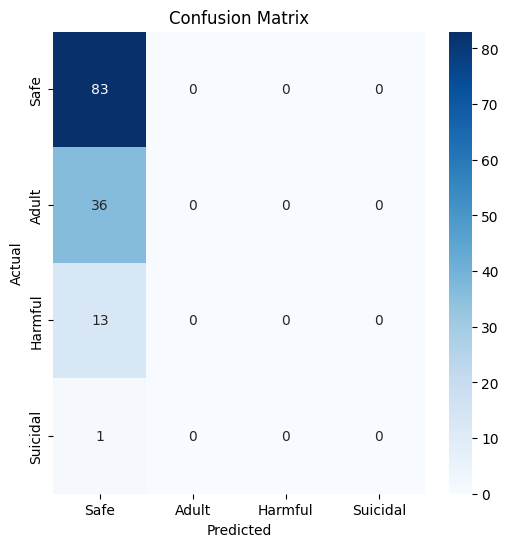

In [65]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()